# KNN - Predict whether a person will have diabetes or not

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv(r'D:\Machine learning\Workbook\knn\Diabates\diabetes.csv')

In [13]:
df.shape

(768, 9)

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [18]:
df.isnull().sum() # df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(0)

Pregnancies


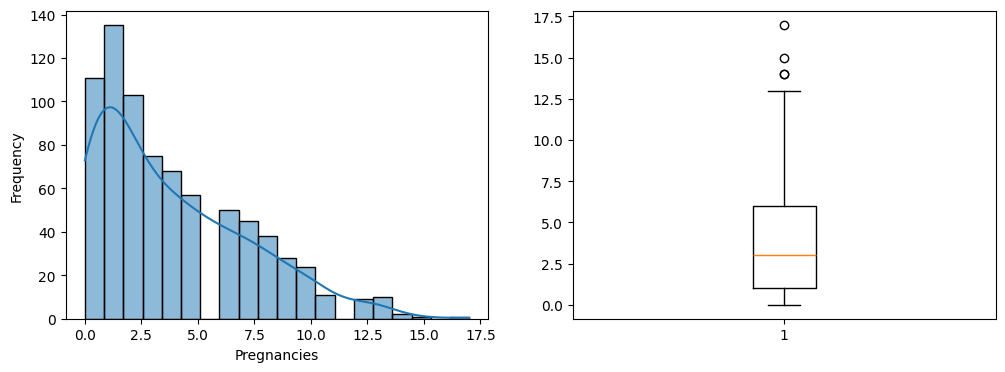

Glucose


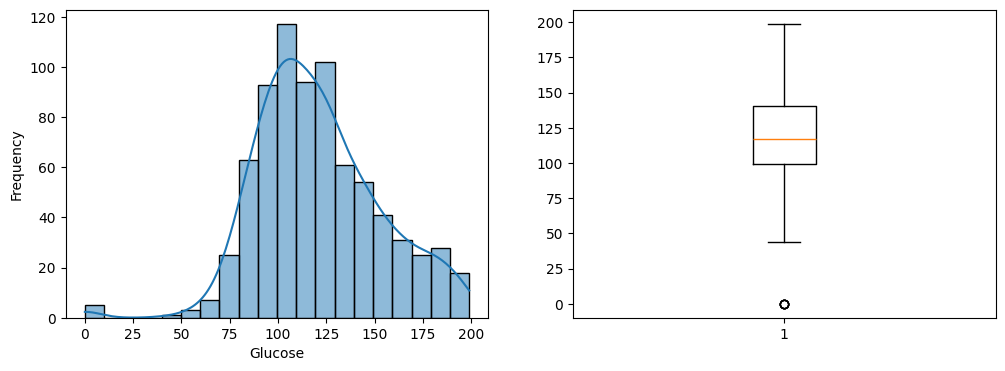

BloodPressure


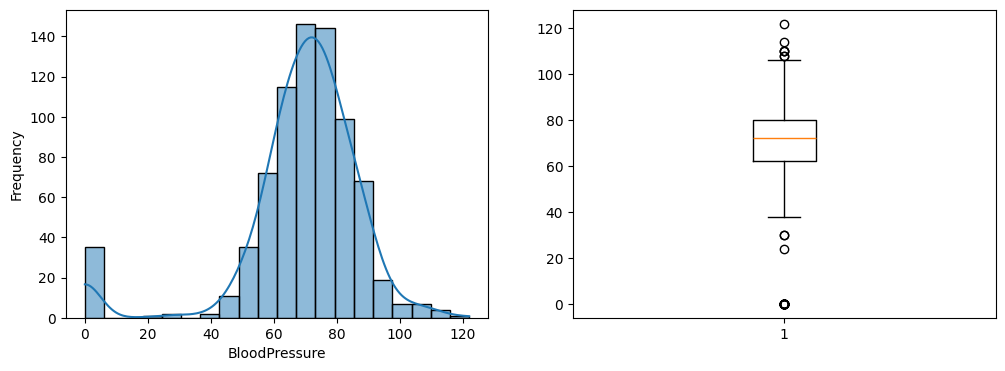

SkinThickness


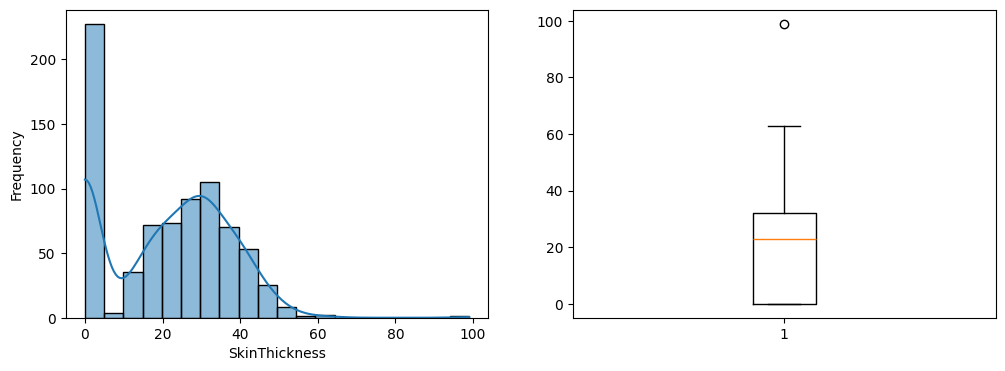

Insulin


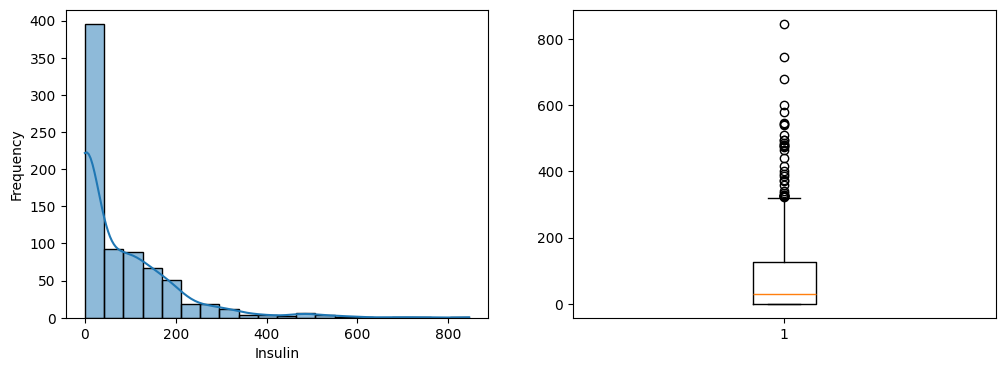

BMI


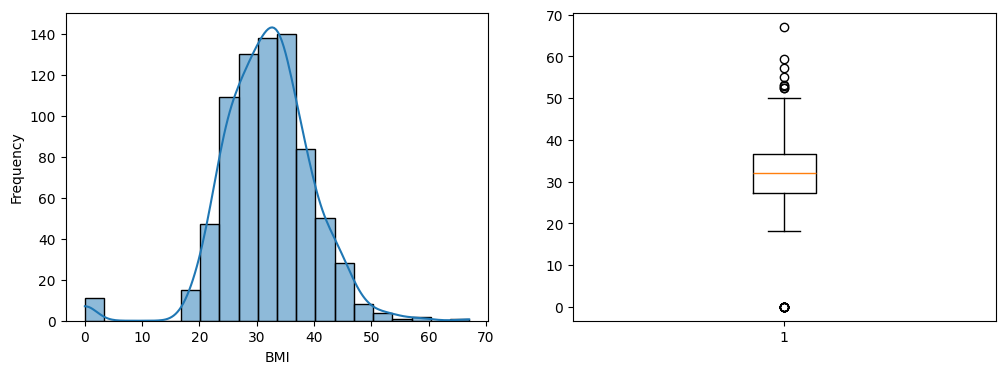

DiabetesPedigreeFunction


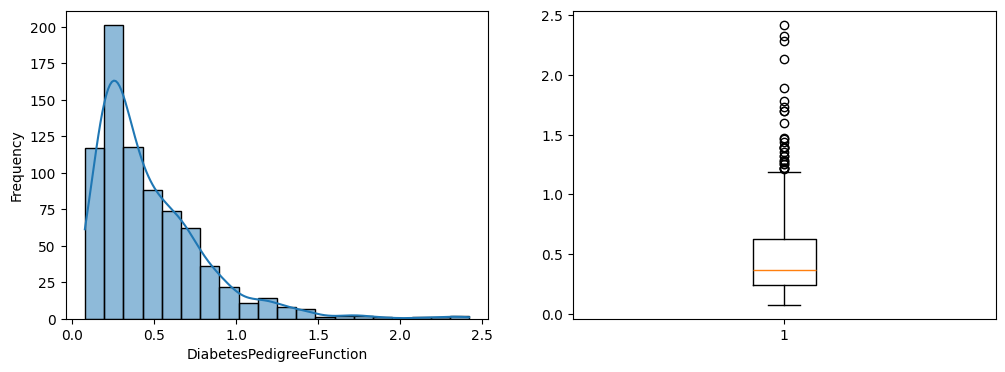

Age


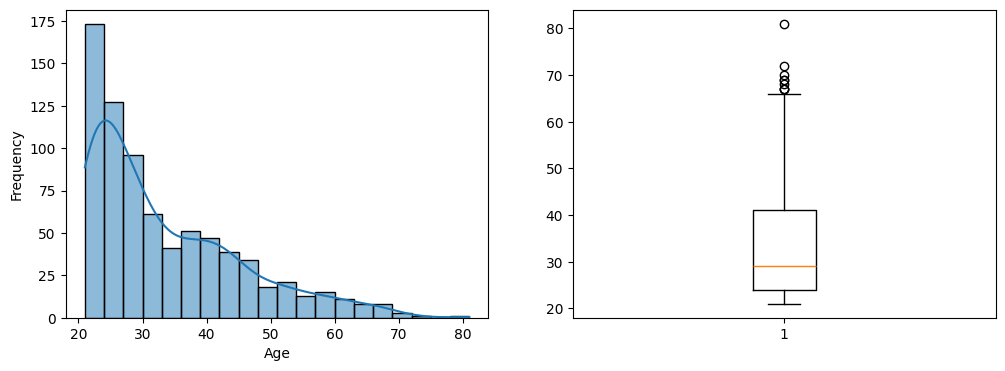

Outcome


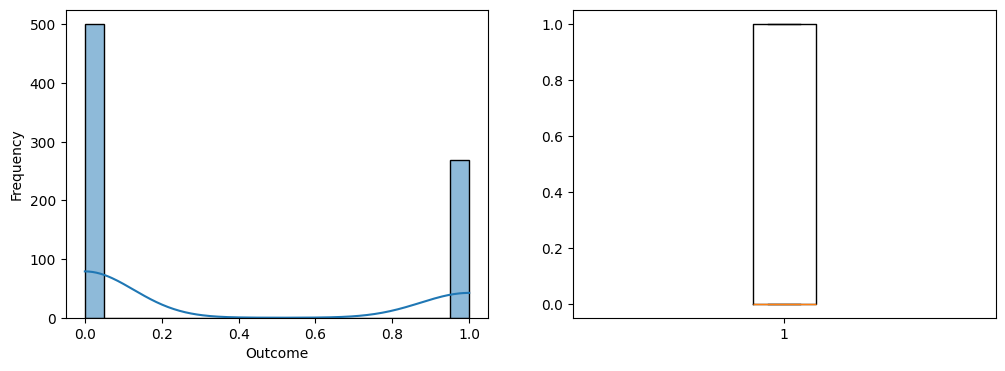

In [20]:
import seaborn as sns
for col in df.columns:
    print(col)
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=20,  alpha=0.5)
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])
    plt.show()


In [21]:
# Replace zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [23]:
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.nan)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.nan, mean)

Text(0.5, 1.0, 'Correlation Heatmap')

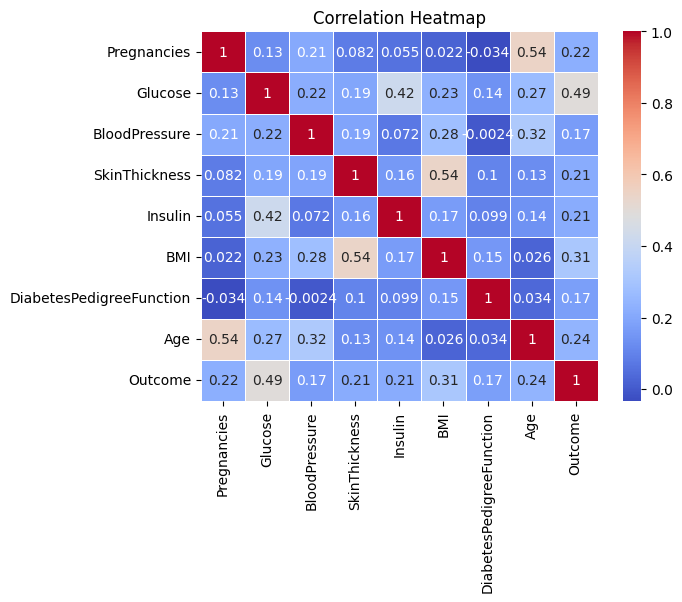

In [ ]:
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **Train-Test Split:**
Divide your dataset into training and testing subsets. The training set will be used to train the KNN model, and the testing set will be used for evaluation.

In [25]:
# Split features and target
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [26]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
len(X_test)

154

### **Feature Scaling:**
Since KNN relies on distance-based calculations, scale your features. You can use techniques like Min-Max scaling or Standardization (z-score normalization).

In [28]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Choosing K:**
Determine the value of K (number of neighbors). Cross-validation can help find the optimal K value.

In [29]:
a = np.sqrt(768)
a

np.float64(27.712812921102035)

In [30]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=27)  # You can choose a different K value

### **KNN Algorithm:**
- For each test data point:
    - Calculate the Euclidean distance between the test point and all training points.
    - Sort the distances and select the top K nearest neighbors.
    - Assign the majority class label among the K neighbors to the test point.

In [31]:
# Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=27)

In [32]:
# Predictions
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

### **Model Evaluation:**
Evaluate the KNN model’s accuracy using metrics like accuracy, precision,

In [33]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f} %")

Accuracy: 72.73 %


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


#### **Assigning New Data**

In [34]:
# You can now use the trained model for predictions
# For example:
new_data_point = [[3, 100, 70, 30, 100, 27.5, 0.3, 40]]  # Replace with your own data
predicted_class = knn.predict(scaler.transform(new_data_point))
print(f"Predicted class: {predicted_class[0]}")

Predicted class: 0
